Author: Shuairui YAO, Zhefu PENG

Problem 1: Your first  task  is  to  make  a  function which will  read  in  this data  from  a  TXT  file to  a M×N matrix, where M is the number of movies and N is the number of users (who rated less than 20movies)

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

In [2]:
start = time.clock()

usrID={}
i = 0
with open('Netflix_data.txt', 'r') as f:
    ## Reading the file in each line
    data = f.readlines()
    for line in data:
        ## Spliting each line, by ',', getting UserID, Rating and Date.
        words = line.split(",")
        if(len(words)!=1):
            ## if len(words) == 1, it would be the Movie ID, we should skip it.
            user = int(words[0])
            rating = float(words[1])
            if user in usrID.keys():
                ## only noting down the user with their number of 3 or above
                if(rating>=3):
                    usrID[user] += 1
            else:
                if(rating>=3):
                    usrID[user] = 1
                    

elapsed = (time.clock()-start)/60
print("minute used: ",elapsed) # min 0.56

minute used:  0.5714193000000001


In [3]:
len(usrID)

467134

In [4]:
for item in list(usrID.keys()):
    if(usrID[item]>20):
        ## user who rated more than 20 movies above 3 would be deleted
        usrID.pop(item)

In [5]:
len(usrID)

231424

In [6]:
start = time.clock()
# Initially we created a zero matrix
resultMatrix=np.zeros((4499,len(usrID)))
user_match = {} # Using the dict 'user_match' to note down the relationship between userID and column number
idx = 0 #Column number,using idx to express the column number of each qualified user
with open('Netflix_data.txt', 'r') as f:
    data = f.readlines() 
    for line in data:
        words = line.split(",")
        if(len(words)==1):
#             getting movieID
            movieID = int(str(words).split(":")[0][2:])
#             movieID = int(words[0][:-2])
        else:
            user = int(words[0])           
            if user in usrID.keys():
                rating = float(words[1])
                if user not in user_match.keys():
                    # Noting down the column number of this user
                    user_match[user]=idx                                     
                    if(rating>=3):
                        # Row number is 0-4498
                        resultMatrix[movieID-1][idx] = 1
                    idx += 1
                else:
                    if(rating>=3):
                        resultMatrix[movieID-1][user_match[user]] = 1
                        
elapsed = (time.clock()-start)/60
print("minute used: ",elapsed) # 0.5min

minute used:  0.4686306666666666


In [7]:
# 4499*231424
resultMatrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

Problem 2:
To get a sense for the data, we will analyze a random sample.  Pick 10,000 pairs at random and compute the average Jaccard distance of the pairs, as well as the lowest distance among them.  Plot a histogram of the pairwise Jaccard distances, and include all results in your report.

In [8]:
def distance(c1,c2):
    return 1-np.logical_and(c1,c2).sum()/np.logical_or(c1,c2).sum()
start = time.clock()

j_dis = []
for i in range(10000):
    # Selecting the random 2 columns(2 users)
    [idx1,idx2] = random.sample(range(len(usrID)), 2)
    j_dis.append(distance(resultMatrix[:,idx1],resultMatrix[:,idx2]))
    
elapsed = (time.clock()-start)/60
print("minute used: ",elapsed) # 2min

minute used:  1.9292236166666668


In [9]:
j_dis_avg = np.mean(j_dis)
j_dis_avg

0.9811627149381295

In [10]:
j_dis_min = min(j_dis)
j_dis_min

0.0

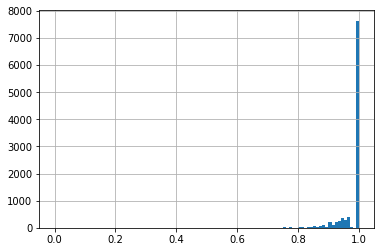

In [11]:
# plot a figure
plt.hist(j_dis,100)
plt.grid(True)
plt.show()

Problem 3: Our  final  goal  will  be  to  find  the  approximate  nearest  neighbor  of  a  queried  user. However, the current matrix representation is not the most efficient way to store the data for this purpose. Find a more efficient way to store the data that you may use for the later Problems. Hint: think of the data structures introduced in class, and how they might allow you to quicklyfind candidates for the nearest neighbor of a user.

In [12]:
start = time.clock()

# resultMatrix 4499*231424
usr_like_pos = {}
for i in range(len(usrID)):
    col = resultMatrix[:,i]
    usr_like_pos[i] = [i for i,x in enumerate(col) if x==1]

elapsed = (time.clock()-start)/60
print("minute used: ",elapsed) # 5.78

minute used:  5.428578716666666


Problem 4: Using your data structure from Problem 3, detect all pairs of users that are close to one another. We define two users as close if their Jaccard distance is below 0.35. You should do this as efficiently as possible, both in terms of storage and time complexity, using the entire dataset. If your solution requires you to pick any parameters, you should justify your choice with plots or data in your report, whichever is appropriate.

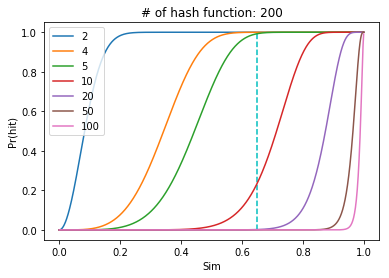

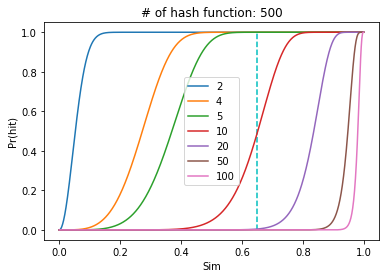

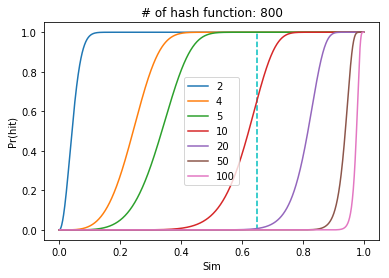

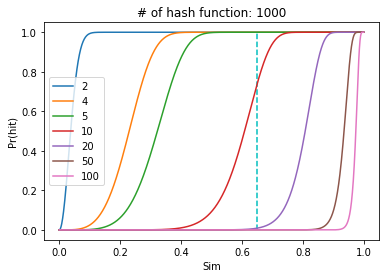

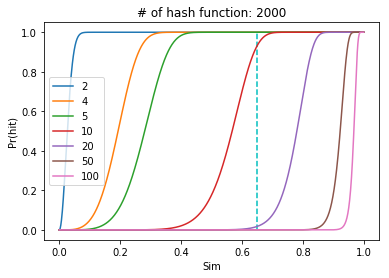

In [13]:
# choose r,b and m
Ms = [200,500,800,1000,2000] # The possible value of M(the number of hash function)
s = np.arange(0,1,0.001) # The range of similarity
for m in Ms:
    r = [2,4,5,10,20,50,100]
    b = [m/i for i in r]
    for i in range(len(r)):        
        plt.plot(s,1-(1-s**r[i])**b[i])
    plt.vlines(0.65, 0, 1, colors = "c", linestyles = "dashed")
    plt.legend(labels = r, loc = 'best')
    plt.xlabel('Sim')
    plt.ylabel('Pr(hit)')
    plt.title("# of hash function: %i" % m)
    plt.show()

In [14]:
start = time.clock()

# (choose m = 500, r = 10, b = 50)
# for computational simplicity, choose a rather small m 500

m = 500
r = 10
b = 50
# generate signature matrix
P = 4507 # P should be a prime number that's larger than or equal to the number of movies

a = []
b = []
for i in range(m):
    a.append(random.randint(1,P))
    b.append(random.randint(1,P))
# Creating the permutaion, just like we want to have y=ax+b.
a = np.array(a).reshape(m,1)
b = np.array(b).reshape(m,1)

# save a and b for problem 5
a1_save = a
b1_save = b
# Generating signature matrix
signature = np.zeros([m,len(usr_like_pos)],np.int16)
for usr in range(len(usr_like_pos)):
    signature[:,usr] = ((a*np.array(usr_like_pos[usr]) + b)%P).min(1)
    
elapsed = (time.clock()-start)/60
print("Minute used: ",elapsed) # 0.25

Minute used:  0.2648521499999996


In [15]:
signature # size m*len(usr_like_pos)

array([[ 303, 1063, 2162, ..., 2708, 2708, 2617],
       [ 124,  366,    5, ..., 3520, 3520,  392],
       [ 373,   60,  711, ..., 2154, 2154, 4167],
       ...,
       [ 688,   64, 1333, ..., 1615, 1615, 3334],
       [ 673,  499,  952, ...,  231,  231, 2117],
       [ 643,  430,  410, ..., 1156, 1156, 3581]], dtype=int16)

In [16]:
start = time.clock()

# partition signature matrix & select candidate pairs
P1 = 4507 # P1 should be a arbitrary large prime number

# save for problem 5
a2_save = []
b2_save = []
hash_values = []# 50*231424

simPairList = []
for i in range(50):# b = 50
    a = []
    b = []
    for j in range(r):
        a.append(random.randint(1,P1))
        b.append(random.randint(1,P1))
    a = np.array(a).reshape(r,1)
    b = np.array(b).reshape(r,1)
    a2_save.append(a)# 50*10
    b2_save.append(b)# 50*10
    band_h_value = np.sum((a*np.array(signature[(i*r):((i+1)*r),:])+b)%P1,axis=0)
    hash_values.append(band_h_value)
    # Getting the value of each bucket
    h_value_distinct = np.array(list(set(band_h_value)))
    for k in list(h_value_distinct):
        simIdx = np.where(band_h_value==k)[0]
        if(len(simIdx)>1):
            simPairList.append(simIdx)
            
elapsed = (time.clock()-start)/60
print("Minute used: ",elapsed) # 1.81

Minute used:  1.858730799999999


In [17]:
start = time.clock()

simPairSet = set()
for i in range(len(simPairList)):
    thisList = simPairList[i]
    length = len(thisList)
    for j in range(length-1):
        for k in range(j+1,length):
            x = set(usr_like_pos[thisList[j]])
            y = set(usr_like_pos[thisList[k]])
            d = 1 - len(x&y)/len(x|y)
            if(d < 0.35):
                # avoid redundance
                simPairSet.add((thisList[j],thisList[k]))
                simPairSet.add((thisList[k],thisList[j]))
                simPairSet.remove((thisList[k],thisList[j]))
    
elapsed = (time.clock()-start)/60
print("Minute used: ",elapsed) # 7

Minute used:  7.678789583333335


In [18]:
len(simPairSet) # list 912952

1898040

In [19]:
pairList = list(simPairSet)

In [20]:
import csv
# save candidate pairs
# store all pairs in one list
with open('similarPairs1898040.csv','w') as writeFile:
    similarWriter = csv.writer(writeFile, delimiter = ',')
    for i in range(len(simPairSet)):
        similarWriter.writerow([pairList[i][0],pairList[i][1]])

Problem 5: Create a function that accepts a queried user and returns their approximate nearest neighbor. This should be done as efficiently as possible.

In [21]:
# function input: a list of movieIDs that a user has liked -- usr_like_mid starting from 0
# function output: the nearest neighbors to the entered user
def near(usr_like_mid):
    P = 4507
    #usr_like_mid = np.array(usr_like_mid)
    signature_new = ((a1_save*np.array(usr_like_mid) + b1_save)%P).min(1)# len = 500
    candidate_sim = []
    similarity = 0
    nearIdx = []
       
    for i in range(50):# b=50  a2_save b*r 50*10
        x = np.sum((a2_save[i]*np.array(signature_new[i*10:(i+1)*10]).reshape(10,1)+b2_save[i])%P)
        # hash_values 50*231424
        idxs = np.where(hash_values[i]==x)[0] # indices of columns that share the same hash value with the quiried user
        candidate_sim.extend(idxs)
    for idx in set(candidate_sim):
        thissim = len(np.intersect1d(usr_like_mid,usr_like_pos[idx]))/len(np.union1d(usr_like_mid,usr_like_pos[idx]))
        if(thissim > similarity):
            similarity = thissim 
    for idx in set(candidate_sim):
        thissim = len(np.intersect1d(usr_like_mid,usr_like_pos[idx]))/len(np.union1d(usr_like_mid,usr_like_pos[idx]))
        if(thissim == similarity):
            nearIdx.append(idx) 
    return nearIdx

In [22]:
near([0])

[18, 67]